In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

In [2]:
#load the file and set the first column as the index
df = pd.read_excel(r"C:\Users\piush\Desktop\Dataset\Assignment_2\House_Prices.xlsx")
df = df.set_index('home')

#### EDA

In [7]:
print ("\n\n---------------------")
print ("DATA SET INFORMATION")
print ("---------------------")
print ("Shape of data set:", df.shape, "\n")
print ("Column Headers:", list(df.columns.values), "\n")
print (df.dtypes)



---------------------
DATA SET INFORMATION
---------------------
Shape of data set: (128, 7) 

Column Headers: ['nbhd', 'offers', 'sqft', 'brick', 'bedrooms', 'bathrooms', 'price'] 

nbhd         object
offers        int64
sqft          int64
brick        object
bedrooms      int64
bathrooms     int64
price         int64
dtype: object


###### Metadata							
1. sqrt	: the size of the house in square feet			(Independent Variable---x)			
2. nbhd	: categorical variable indicating which of the 3 neighbourhoods the house is in						
3. brick	: categorical variable indicating whether the hsoue is made of brick						
4. offers	: offers on the property						
5. bedrooms	: numerical variable indicating the number of bedrooms						
6. bathrooms	: numerical variable indicating the number of bathrooms						
7. price	: numerical variable indicating the asking price		(Dependent Variable---y)	

http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/introductory-concepts/data-concepts/cat-quan-variable/

http://www.dummies.com/education/math/statistics/types-of-statistical-data-numerical-categorical-and-ordinal/


In [8]:
import re
missing_values = []
nonumeric_values = []

print ("DATA SET INFORMATION")
print ("========================\n")

for column in df:
    # Find all the unique feature values
    uniq = df[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(df[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

DATA SET INFORMATION

'nbhd' has 3 unique values
['nbhd02' 'nbhd01' 'nbhd03']

-----------------------------------------------------------------------

'offers' has 6 unique values
[2 3 1 4 5 6]

-----------------------------------------------------------------------

'sqft' has 61 unique values
~~Listing up to 10 unique values~~
[1790 2030 1740 1980 2130 1780 1830 2160 2110 1730]

-----------------------------------------------------------------------

'brick' has 2 unique values
['No' 'Yes']

-----------------------------------------------------------------------

'bedrooms' has 4 unique values
[2 4 3 5]

-----------------------------------------------------------------------

'bathrooms' has 3 unique values
[2 3 4]

-----------------------------------------------------------------------

'price' has 123 unique values
~~Listing up to 10 unique values~~
[114300 114200 114800  94700 119800 114600 151600 150700 119200 104000]

------------------------------------------------------------

In [3]:
#get summary of numerical variables
df.describe()

,offers,sqft,bedrooms,bathrooms,price
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.578125,2000.937500,3.023438,2.445312,130427.343750
std,1.069324,211.572431,0.725951,0.514492,26868.770371
min,1.000000,1450.000000,2.000000,2.000000,69100.000000
25%,2.000000,1880.000000,3.000000,2.000000,111325.000000
50%,3.000000,2000.000000,3.000000,2.000000,125950.000000
75%,3.000000,2140.000000,3.000000,3.000000,148250.000000
max,6.000000,2590.000000,5.000000,4.000000,211200.000000


In [4]:
df['offers'].median()

3.0

In [5]:
df['sqft'].median()

2000.0

In [6]:
df['price'].median()

125950.0

###### For the non-numerical values, we can look at frequency distribution to understand whether they make sense or not.

In [10]:
df['nbhd'].value_counts()

nbhd02    45
nbhd01    44
nbhd03    39
Name: nbhd, dtype: int64

In [11]:
df['brick'].value_counts()

No     86
Yes    42
Name: brick, dtype: int64

###### two dimensional table to create a stacked barplot. Stacked barplots show the distribution of a second categorical variable within each bar:¶

In [12]:
nbhd_brick_table = pd.crosstab(index=df["nbhd"], 
                          columns=df["brick"])
nbhd_brick_table

brick,No,Yes
nbhd,,
nbhd01,37,7
nbhd02,26,19
nbhd03,23,16


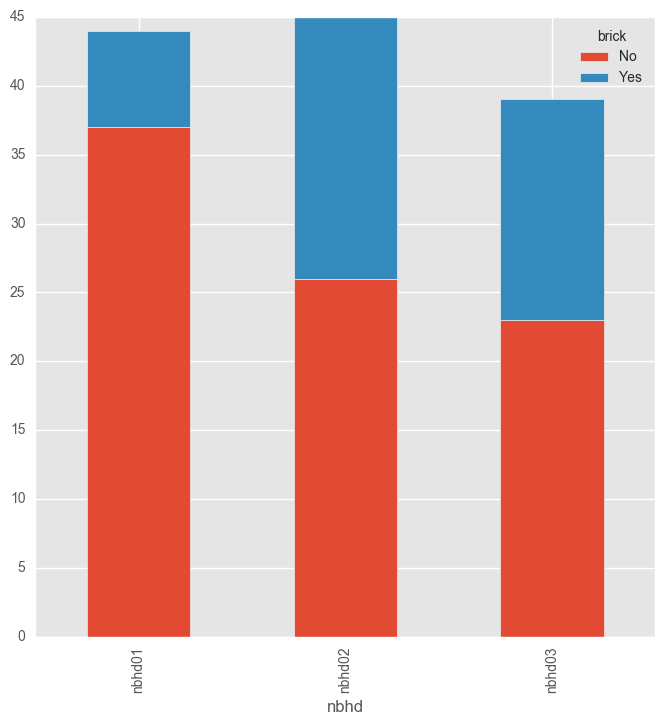

In [13]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (4, 3)

nbhd_brick_table.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

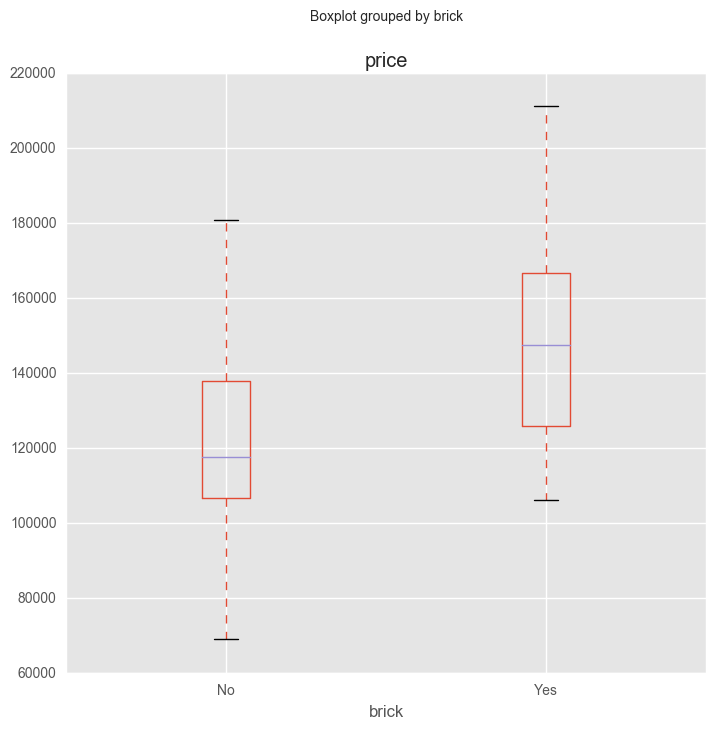

In [14]:
df.boxplot(column="price",        # Column to plot
                 by= "brick",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [15]:
df[(df['brick'] == 'Yes')].median()


offers            2.5
sqft           2015.0
bedrooms          3.0
bathrooms         3.0
price        147500.0
dtype: float64

In [16]:
df[(df['brick'] == 'No')].median()


offers            3.0
sqft           1995.0
bedrooms          3.0
bathrooms         2.0
price        117650.0
dtype: float64

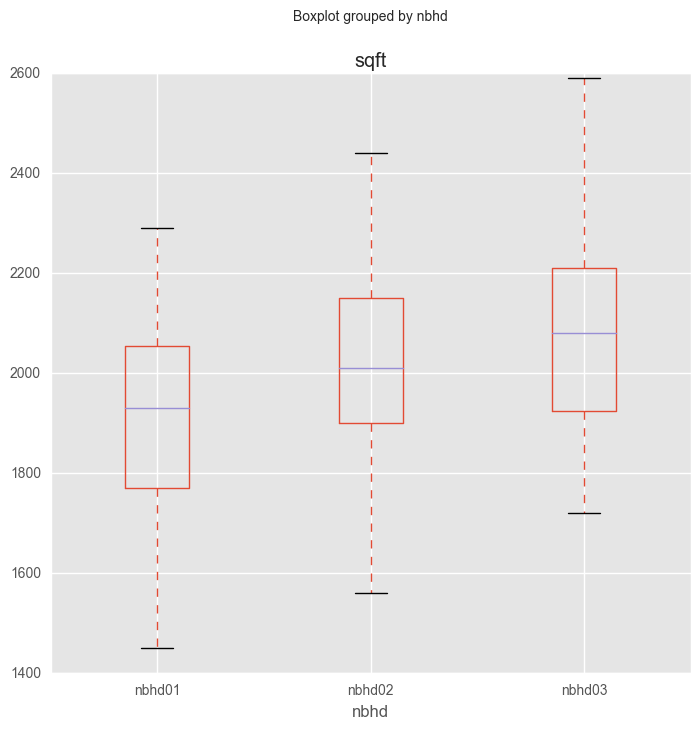

In [72]:
df.boxplot(column="sqft",        # Column to plot
                 by= "nbhd",         # Column to split upon
                 figsize= (8,8))        # Figure size

In [4]:
df[(df['nbhd'] == 'nbhd01')].mean()

offers            3.068182
sqft           1916.818182
bedrooms          2.659091
bathrooms         2.250000
price        110154.545455
dtype: float64

In [5]:
df[(df['nbhd'] == 'nbhd02')].mean()

offers            2.555556
sqft           2014.000000
bedrooms          2.933333
bathrooms         2.444444
price        125231.111111
dtype: float64

In [6]:
df[(df['nbhd'] == 'nbhd03')].mean()

offers            2.051282
sqft           2080.769231
bedrooms          3.538462
bathrooms         2.666667
price        159294.871795
dtype: float64

In [72]:
df[(df['sqft'] == 2590)]

,nbhd,offers,sqft,brick,bedrooms,bathrooms,price,sqft_c
home,,,,,,,,
15,nbhd03,4,2590,No,4,3,176800,589.0625


In [73]:
df[(df['sqft'] == 2530)]

,nbhd,offers,sqft,brick,bedrooms,bathrooms,price,sqft_c
home,,,,,,,,
106,nbhd03,4,2530,No,4,3,146900,529.0625


In [76]:
df['price'].max()

211200

In [78]:
df[(df['price'] == 211200)]

,nbhd,offers,sqft,brick,bedrooms,bathrooms,price,sqft_c
home,,,,,,,,
104,nbhd03,3,2440,Yes,4,3,211200,439.0625


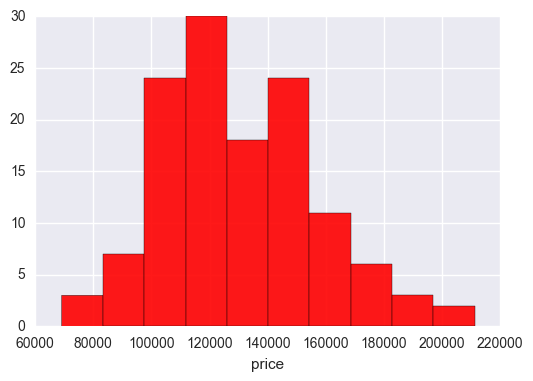

In [7]:
sns.distplot(df['price'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

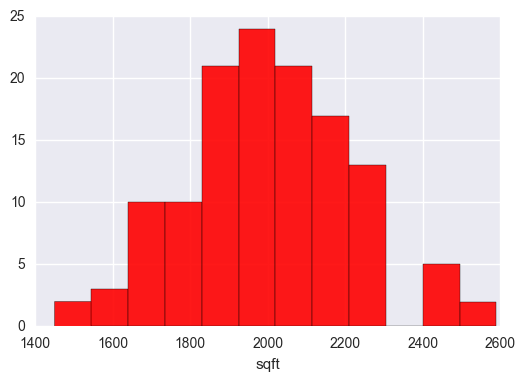

In [8]:
sns.distplot(df['sqft'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

http://stattrek.com/probability-distributions/discrete-continuous.aspx

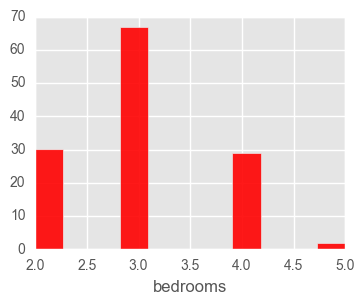

In [23]:
sns.distplot(df['bedrooms'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

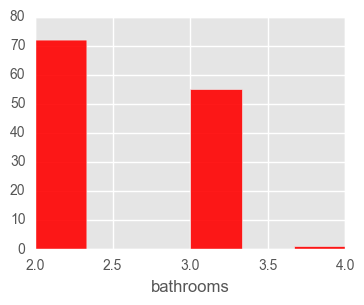

In [24]:
sns.distplot(df['bathrooms'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

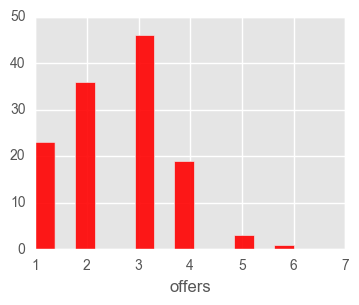

In [25]:
sns.distplot(df['offers'], kde = False, color = 'r', hist_kws={'alpha': 0.9})

##### Bivariate Analysis

https://en.wikipedia.org/wiki/P-value,
https://en.wikipedia.org/wiki/Null_hypothesis, 
https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

http://www.statisticshowto.com/what-is-the-pearson-correlation-coefficient/

https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php


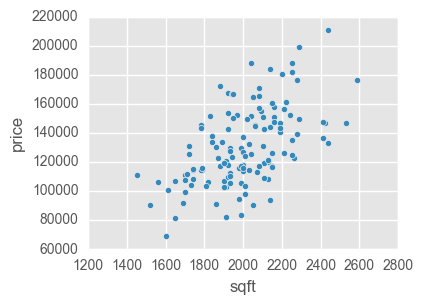

In [26]:
df.plot(kind="scatter",     # Create a scatterplot
              x="sqft",          # Put square feet on the x axis
              y="price")          # Put price on the y axis

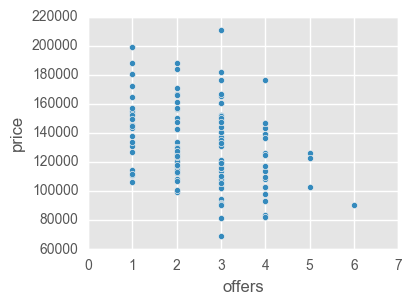

In [27]:
df.plot(kind="scatter",     # Create a scatterplot
              x="offers",          # Put square feet on the x axis
              y="price")          # Put price on the y axis

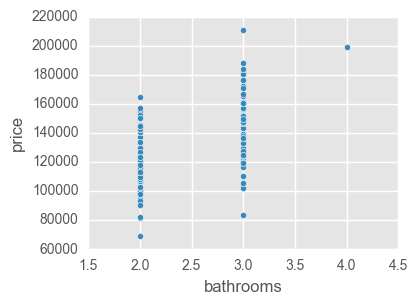

In [28]:
df.plot(kind="scatter",     # Create a scatterplot
              x="bathrooms",          # Put square feet on the x axis
              y="price")          # Put price on the y axis

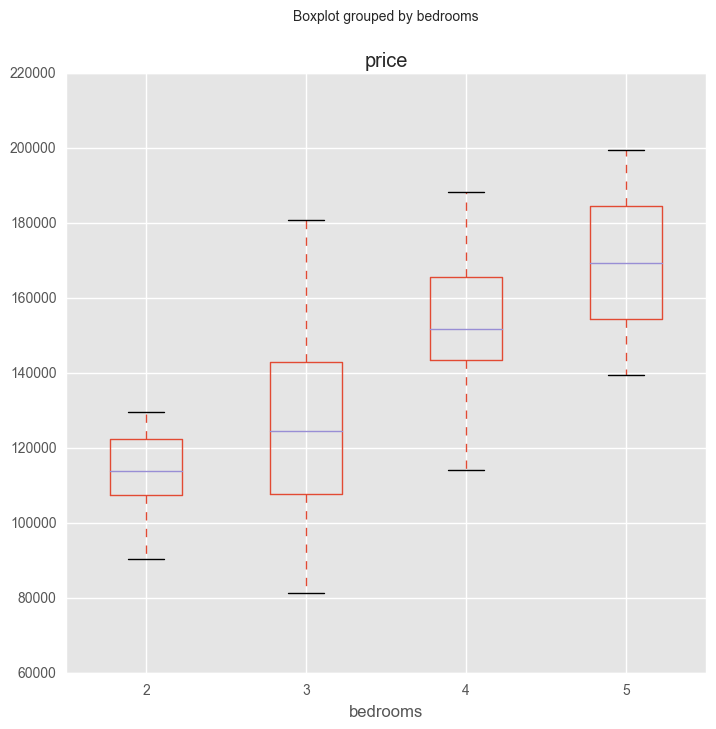

In [29]:
df.boxplot(column="price",        # Column to plot
                 by= "bedrooms",         # Column to split upon
                 figsize= (8,8))        # Figure size

#### Is the price associated with sqft

In [30]:
############################################################################################
# BASIC LINEAR REGRESSION
############################################################################################

Axes(0.125,0.125;0.775x0.775)


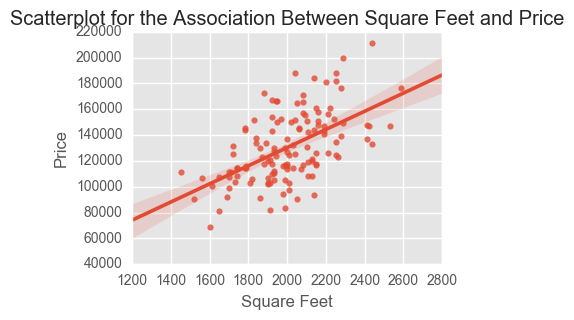

In [31]:
scat1 = sns.regplot(x="sqft", y="price", scatter=True, data=df)

plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title ('Scatterplot for the Association Between Square Feet and Price')
print(scat1)

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

In [17]:
print ("OLS regression model for the association between price and square feet")
# reg1 is the model name , followed by equal sign. In the parantheses 
#write the formula the two quantative variables there is a tilda in between
# and the formula is in quotes

# read for more information
# http://statsmodels.sourceforge.net/devel/example_formulas.html
reg1 = smf.ols(formula = 'price ~ sqft', data=df).fit()
# print the result
print (reg1.summary())

OLS regression model for the association between price and square feet
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     55.50
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           1.30e-11
Time:                        18:23:14   Log-Likelihood:                -1463.2
No. Observations:                 128   AIC:                             2930.
Df Residuals:                     126   BIC:                             2936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------

Dep. variable is the name of the response variable

No. of observations show the valid observations

F-statistics is 55.50 and Prob(F-statistics is very small. Hence we can reject the null hypothesis. )

Parameter estimates : Intercept and sqft. therefore

price = -1.009e+04 + 70.22 * sqft

** price = -1.009 * 10 raise to the power of 04 

(e means "times ten to the power of...". 
2.3e-5, means 2.3 times ten to the minus five power, or 0.000023)

p>|t| is the pearson value for explanotory variables... when 0.000 p < 0.001

R-squared value : proportion of the variance. such as 30.6 % variance in the dataset.

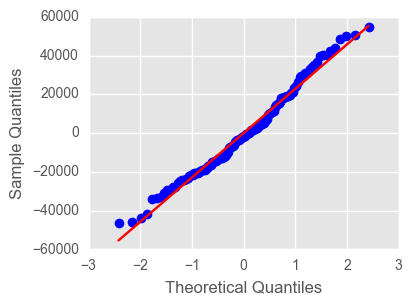

In [34]:
#Q-Q plot for normality
fig4=sm.qqplot(reg1.resid, line='r')

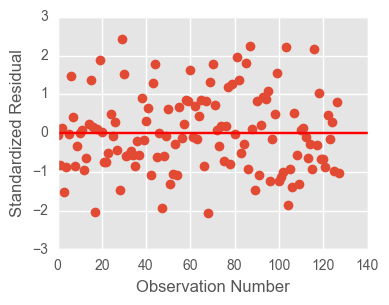

In [35]:
# simple plot of residuals
stdres=pd.DataFrame(reg1.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')


In [36]:
from pydoc import help
from scipy.stats.stats import pearsonr
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculates a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 

In [37]:
pearsonr(df.sqft,df.price)

(0.55298224255548378, 1.3023832242124747e-11)

slope : slope of the regression line

intercept : intercept of the regression line

r-value : correlation coefficient

p-value : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero

stderr : Standard error of the estimate
    
    https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

In [38]:
from scipy.stats import linregress
linregress(df.sqft,df.price)

LinregressResult(slope=70.226318242885199, intercept=-10091.12990912309, rvalue=0.55298224255548378, pvalue=1.3023832242124713e-11, stderr=9.4264696797749838)

In [39]:
slope, intercept, r_value, p_value, std_err = linregress(df.sqft,df.price)

In [40]:
# To get coefficient of determination (r_squared)
print ("r-squared:", r_value**2)

r-squared: 0.305789360582


In [41]:
print (np.corrcoef(df.sqft,df.price))

[[ 1.          0.55298224]
 [ 0.55298224  1.        ]]


In [42]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [43]:
df.columns

Index(['nbhd', 'offers', 'sqft', 'brick', 'bedrooms', 'bathrooms', 'price'], dtype='object')

In [44]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

Find most important features relative to target
price        1.000000
sqft         0.552982
bedrooms     0.525926
bathrooms    0.523258
offers      -0.313636
Name: price, dtype: float64


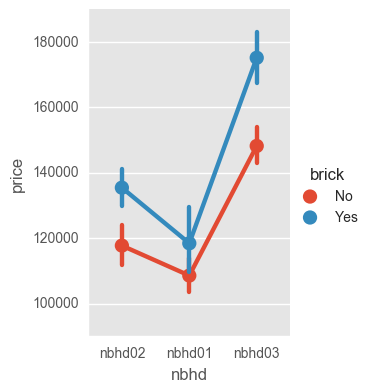

In [45]:
#2 way Anova along the price
#https://people.richland.edu/james/lecture/m170/ch13-2wy.html

#http://www.statstutor.ac.uk/resources/uploaded/coventrytwowayanova.pdf

#https://statistics.laerd.com/spss-tutorials/two-way-anova-using-spss-statistics-t.php?utm_expid=25601712-8.Jdr6DhafTz-H75YJtEJF9w.1&utm_referrer=https%3A%2F%2Fwww.google.ie%2F

sns.factorplot('nbhd', 'price', hue = 'brick',  data = df, 
             size = 4, aspect = .8)

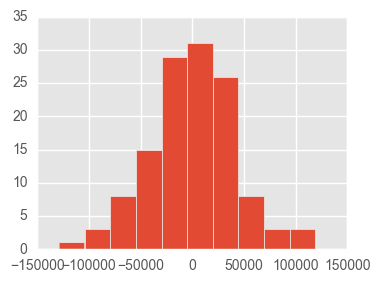

In [46]:
df['price'].diff().hist()

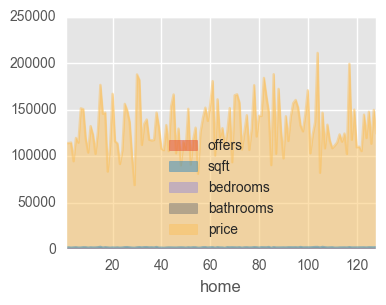

In [47]:
df.plot.area(stacked=False);

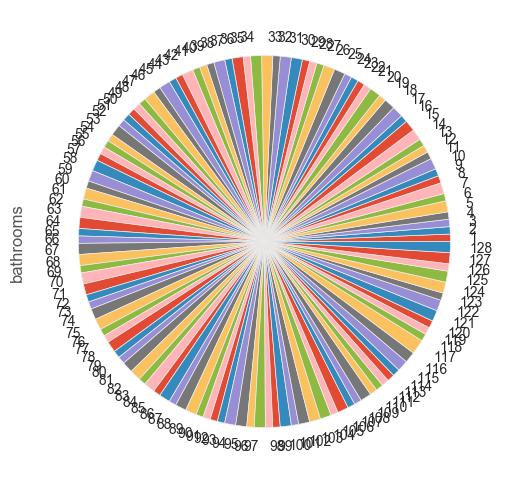

In [48]:
df['bathrooms'].plot.pie(figsize=(6, 6))

In [49]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D733CB2CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001D7341620B8>]], dtype=object)

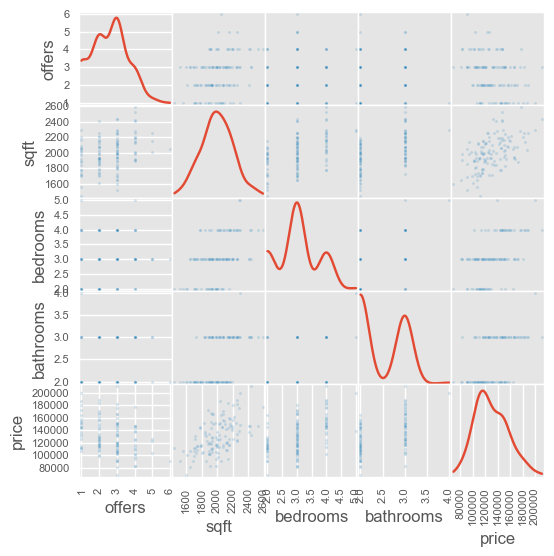

In [50]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

http://seaborn.pydata.org/tutorial/categorical.html

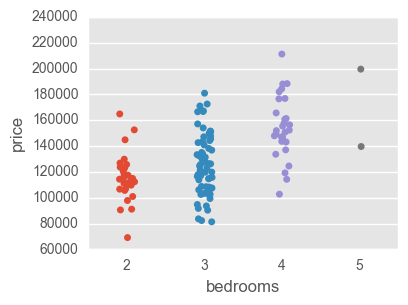

In [51]:
sns.stripplot(x="bedrooms", y="price", data=df, jitter=True);

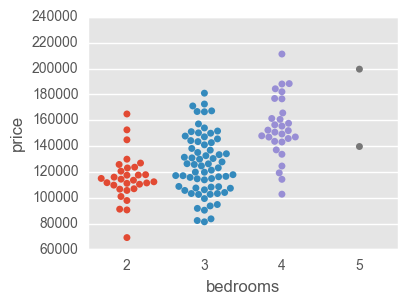

In [52]:
sns.swarmplot(x="bedrooms", y="price", data=df);

In [51]:
df.loc[df['bedrooms'] == 4].max()

nbhd          nbhd03
offers             4
sqft            2590
brick            Yes
bedrooms           4
bathrooms          3
price         211200
sqft_c       589.062
dtype: object

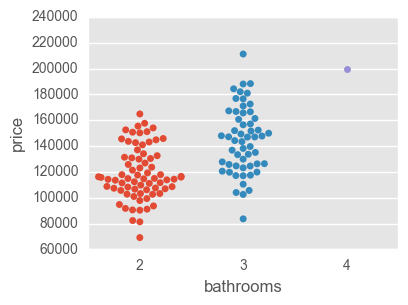

In [54]:
sns.swarmplot(x="bathrooms", y="price", data=df);

In [50]:
df.loc[df['bathrooms'] == 3].max()

nbhd          nbhd03
offers             5
sqft            2590
brick            Yes
bedrooms           5
bathrooms          3
price         211200
sqft_c       589.062
dtype: object

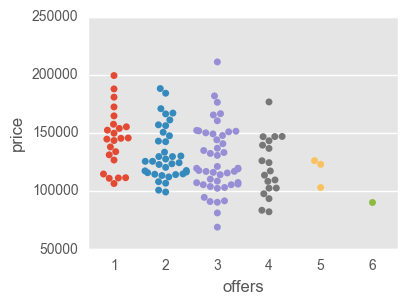

In [56]:
sns.swarmplot(x="offers", y="price", data=df);

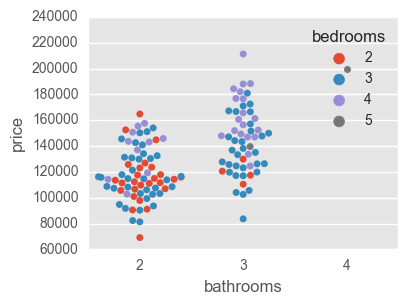

In [57]:
sns.swarmplot(x="bathrooms", y="price", hue="bedrooms", data=df);

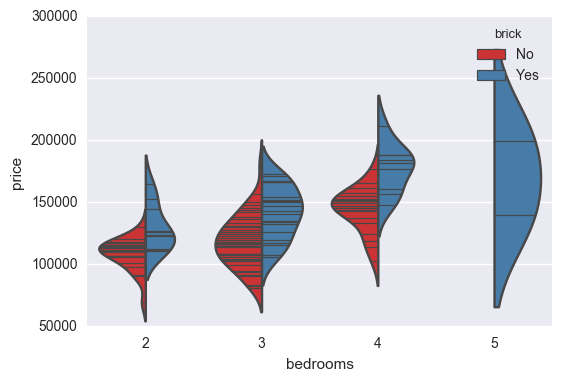

In [60]:
sns.violinplot(x="bedrooms", y="price", hue="brick",  data=df,split=True, inner="stick", palette="Set1");

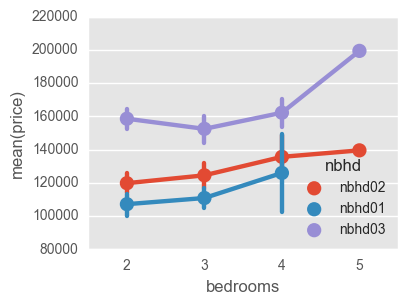

In [59]:
sns.pointplot(x="bedrooms", y="price", hue="nbhd", data=df);

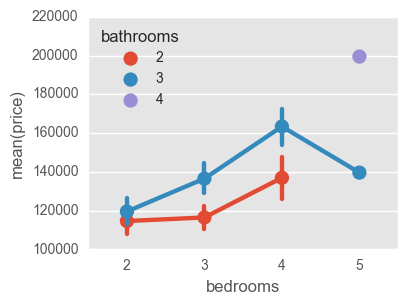

In [60]:
sns.pointplot(x="bedrooms", y="price", hue="bathrooms", data=df);

In [61]:
# Encode some categorical features as ordered numbers when there is information in the order
df_copy= df.replace({"nbhd" : {"nbhd01" : 1, "nbhd02" : 2, "nbhd03" : 3},
                       "brick" : {"Yes" : 1, "No" : 0}}
                      )

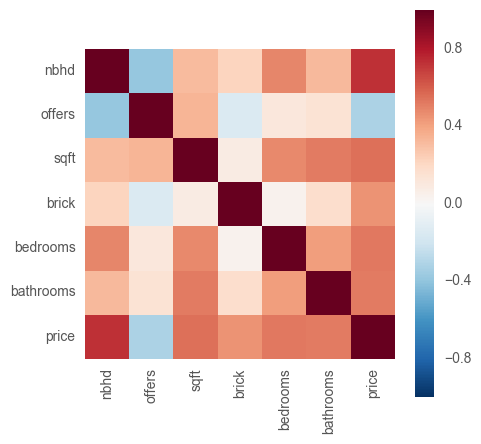

In [62]:
corr = df_copy.iloc[:, 0:].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, vmax=1, square=True)

In [63]:
cor_dict = corr['price'].to_dict()
del cor_dict['price']
print("List the numerical features decendingly by their correlation with Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List the numerical features decendingly by their correlation with Price:

nbhd: 	0.7323335104041765
sqft: 	0.5529822425554838
bedrooms: 	0.5259260576398529
bathrooms: 	0.5232577581859738
brick: 	0.4528167861905481
offers: 	-0.3136358828617982


In [32]:
dir(smf)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PHReg',
 'Poisson',
 'Probit',
 'QuantReg',
 'RLM',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gee',
 'glm',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

In [79]:
# multiple regression analysis with sqft & neighbourhood
reg4 = smf.ols(formula = 'price ~ sqft +bedrooms + bathrooms + offers + C(brick) + C(nbhd)', data=df).fit()
print (reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           8.25e-50
Time:                        23:30:11   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          2159.4982   8877.81

In [30]:
print (reg4.params)

Intercept             2159.498187
C(nbhd)[T.nbhd02]    -1560.579119
C(nbhd)[T.nbhd03]    20681.037351
C(brick)[T.Yes]      17297.349528
sqft                    52.993741
bedrooms              4246.793892
bathrooms             7883.278493
offers               -8267.488318
dtype: float64


In [48]:
# centering sqft variable
df['sqft_c']=(df['sqft'] - df['sqft'].mean())
print (df['sqft_c'].mean()) 

reg5 = smf.ols('price ~ sqft_c', data=df).fit()
print (reg5.summary())

0.0
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     55.50
Date:                Mon, 19 Dec 2016   Prob (F-statistic):           1.30e-11
Time:                        18:40:02   Log-Likelihood:                -1463.2
No. Observations:                 128   AIC:                             2930.
Df Residuals:                     126   BIC:                             2936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.304e+05   1986.575     65.654     

In [71]:
df.head(30)

,nbhd,offers,sqft,brick,bedrooms,bathrooms,price,sqft_c,price_c
home,,,,,,,,,
1,nbhd02,2,1790,No,2,2,114300,-210.9375,-16127.34375
2,nbhd02,3,2030,No,4,2,114200,29.0625,-16227.34375
3,nbhd02,1,1740,No,3,2,114800,-260.9375,-15627.34375
4,nbhd02,3,1980,No,3,2,94700,-20.9375,-35727.34375
5,nbhd02,3,2130,No,3,3,119800,129.0625,-10627.34375
6,nbhd01,2,1780,No,3,2,114600,-220.9375,-15827.34375
7,nbhd03,3,1830,Yes,3,3,151600,-170.9375,21172.65625
8,nbhd03,2,2160,No,4,2,150700,159.0625,20272.65625
9,nbhd02,3,2110,No,4,2,119200,109.0625,-11227.34375


##### Modelling

In [151]:
#Separate into target variable and other variables
train_m = df_copy.drop(['price','offers'], axis=1)
y = df_copy.price

In [152]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [153]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_m, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (89, 5)
X_test : (39, 5)
y_train : (89,)
y_test : (39,)


In [154]:
# Define : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 13505.7172736
RMSE on Test set : 14367.6216106


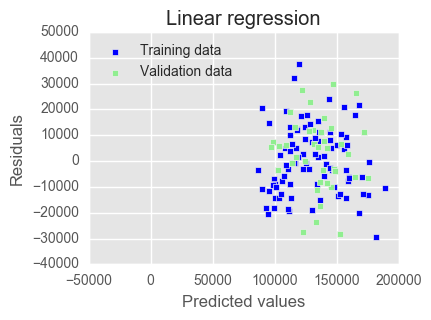

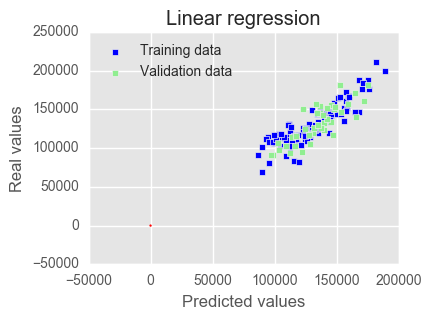

In [155]:
# Linear Regression without regularisation
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = .5, xmax = 1, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([.5, .9], [.5, .9], c = "red")
plt.show()

Best alpha : 0.0001
Try again for more precision with alphas centered around 0.0001
Best alpha : 6e-05
Lasso RMSE on Training set : 13505.7172757
Lasso RMSE on Test set : 14367.6215494


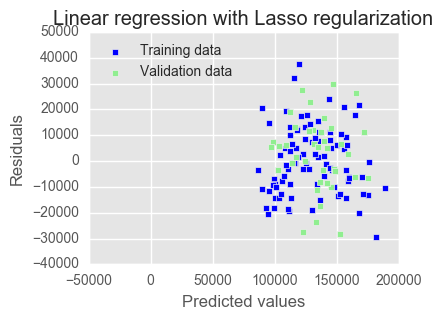

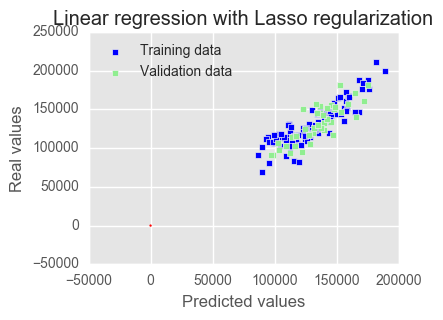

Lasso picked 5 features and eliminated the other 0 features


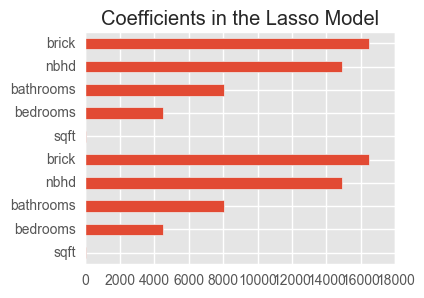

In [156]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()